In [2]:
# https://blog.csdn.net/youcans/article/details/124158303
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt #最后两个库为了画子图使用

210
477
3.141592653589793
(210, 477)


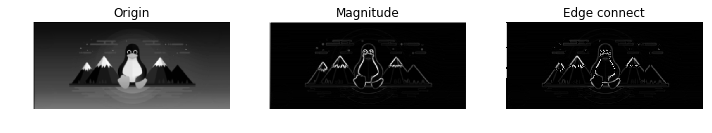

In [3]:
# 11.9 边缘连接的局部处理方法
img = cv2.imread("linux-cover.jpeg", cv2.IMREAD_GRAYSCALE)  # flags=0 读取为灰度图像
# img16 = np.array(img, dtype='uint16')
hImg, wImg = img.shape#[0], img.shape[1]
print(hImg)
print(wImg)

# Sobel 梯度算子
kSobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kSobelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
gx = cv2.filter2D(img, cv2.CV_64F, kSobelX)  # SobelX 水平梯度
gy = cv2.filter2D(img, cv2.CV_64F, kSobelY)  # SobelY 垂直梯度

# 计算梯度向量的幅值 mag 与角度 angle
# magn = np.sqrt(np.power(gx,2) + np.power(gy,2))  # 梯度向量的幅值
magn = cv2.normalize(abs(gx)+abs(gy), None, 0, 255, cv2.NORM_MINMAX)  # 用绝对值近似梯度幅值

# gxFlat, gyFlat = gx.flatten(), gy.flatten()  # 展平为一维，便于计算角度
angleFlat = np.arctan2(gy, gx) * 180 / np.pi  # 梯度向量的角度，将弧度转为角度: (-180, 180)
print(np.pi)
angle = angleFlat.reshape(hImg, wImg)
print(angle.shape)
# 边缘像素相似性判断
edge = np.zeros((hImg,wImg), np.uint8)
for h in range(1, hImg-1):  # 对边界点不判断
    for w in range(1, wImg-1):
        if (abs(magn[h,w]-magn[h-1,w-1])<=30) and (abs(angle[h,w]-angle[h-1,w-1])<=15)\
        or (abs(magn[h,w]-magn[h-1,w+1])<=30) and (abs(angle[h,w]-angle[h-1,w+1])<=15)\
        or (abs(magn[h,w]-magn[h+1,w-1])<=30) and (abs(angle[h,w]-angle[h+1,w-1])<=15)\
        or (abs(magn[h,w]-magn[h+1,w+1])<=30) and (abs(angle[h,w]-angle[h+1,w+1])<=15):
            edge[h,w] = magn[h,w]

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.title("Origin"), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(132), plt.title("Magnitude"), plt.imshow(np.uint8(magn), cmap='gray'), plt.axis('off')
# plt.subplot(133), plt.title("angle"), plt.imshow(np.uint8(angle), cmap='gray'), plt.axis('off')
plt.subplot(133), plt.title("Edge connect"), plt.imshow(np.uint8(edge), cmap='gray'), plt.axis('off')
plt.tight_layout()
plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0 255   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]
[[  0   0 255 ...   0   0   0]
 [  0 255   0 ... 255 255 255]
 [  0   0 255 ...   0   0   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]


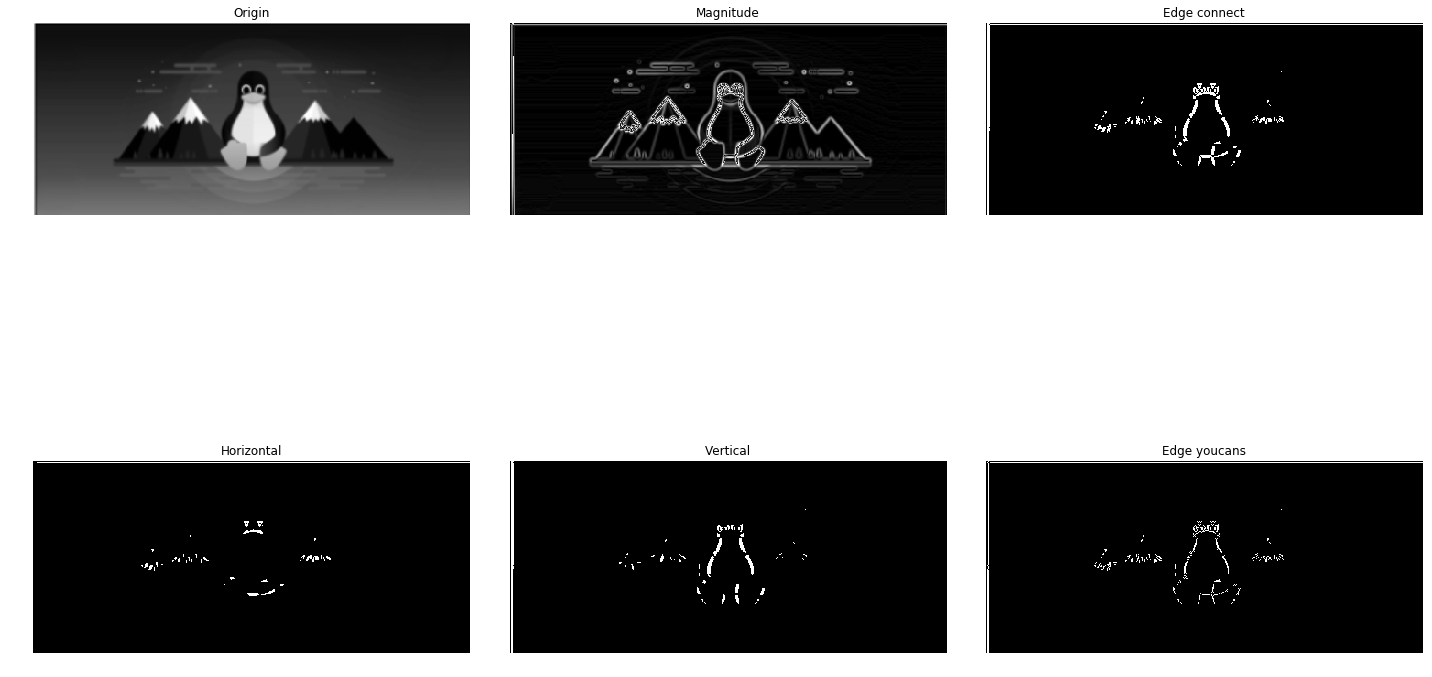

In [5]:
 # 11.10 边缘连接的局部处理简化算法
img = cv2.imread("linux-cover.jpeg", cv2.IMREAD_GRAYSCALE)  # flags=0 读取为灰度图像
hImg, wImg = img.shape# (1) Sobel 计算梯度
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # SobelX 水平梯度
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # SobelY 垂直梯度
# magn, angle = cv2.cartToPolar(gx, gy, angleInDegrees=1)  # 计算梯度幅值 mag 和角度 angle

magn = np.sqrt(np.power(gx,2) + np.power(gy,2))  # 梯度向量的幅值
# magn = cv2.normalize(abs(gx)+abs(gy), None, 0, 255, cv2.NORM_MINMAX)  # 用绝对值近似梯度幅值
gxFlat, gyFlat = gx.flatten(), gy.flatten()  # 展平为一维，便于计算角度
angleFlat = np.arctan2(gy, gx) * 180 / np.pi  # 梯度向量的角度，将弧度转为角度: (-180, 180)
angle = angleFlat.reshape(hImg, wImg)  # youcans@xupt
angle = np.abs(angle)  # 角度转为: (0, 18# (2) 二值化处理

# (2) 二值化处理
TM = 0.25 * magn.max()  # TM 设为最大梯度的 20%
A, Ta = 90, 30  # A=90 水平扫描, Ta = 30
edgeX = np.zeros((hImg, wImg), np.uint8)  # 水平边缘
for h in range(hImg):
    for w in range(wImg):
        if (magn[h, w] > TM) and (A-Ta < angle[h, w] < A+Ta):
            edgeX[h, w] = 255
edgeY = np.zeros((hImg, wImg), np.uint8)  # 垂直边缘
for h in range(hImg):
    for w in range(wImg):
        if (magn[h, w] > TM) and ((angle[h,w]<Ta) | (angle[h,w]>180-Ta)):
            edgeY[h, w] = 255

# (3) 水平垂直边缘合成
edgeConnect = cv2.bitwise_or(edgeX, edgeY)

# (4) 边缘细化
edge = edgeConnect.copy()
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print(element)
edgeThin = np.zeros(edge.shape, np.uint8)  # 创建空骨架图
while True:
    imgOpen = cv2.morphologyEx(edge, cv2.MORPH_OPEN, element)  # 开运算
    subSkel = cv2.subtract(edge, imgOpen)  # 获得骨架子集
    edgeThin = cv2.bitwise_or(edgeThin, subSkel)  # # 将删除的像素添加到骨架图
    edge = cv2.erode(edge, element)  # 腐蚀，用于下一次迭代
    if cv2.countNonZero(edge) == 0:
        break
plt.figure(figsize=(20, 15))
plt.subplot(231), plt.title("Origin"), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(232), plt.title("Magnitude"), plt.imshow(np.uint8(magn), cmap='gray'), plt.axis('off')
plt.subplot(233), plt.title("Edge connect"), plt.imshow(edgeConnect, cmap='gray'), plt.axis('off')
plt.subplot(234), plt.title("Horizontal"), plt.imshow(edgeX, cmap='gray'), plt.axis('off')
plt.subplot(235), plt.title("Vertical"), plt.imshow(edgeY, cmap='gray'), plt.axis('off')
plt.subplot(236), plt.title("Edge youcans"), plt.imshow(edgeThin, cmap='gray'), plt.axis('off')
plt.tight_layout()
plt.show()